## Installations

In [1]:
!pip install imbalanced-learn

In [2]:
! pip install xgboost

## Include Libraries

In [3]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import imblearn
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 

import statistics

In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Read Files

In [5]:
# Test Files
test_data = pd.read_excel(r"./datafiles/Testing Data.xlsx")
test_data.shape 

(2121, 57)

In [6]:
# Train Files
train_data = pd.read_excel(r"./datafiles/Training Data.xlsx")
train_data.shape 

(8481, 58)

In [7]:
features = pd.read_excel(r"./datafiles/Feature Description.xlsx")
features.shape 

(59, 3)

														Training Data

## Analysis

In [8]:
train_data 

,PatientId,EncounterId,DischargeDisposision,Gender,Race,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,...,Diuretics,TotalMedicine,CardiacTroponin,Hemoglobin,SerumSodium,SerumCreatinine,BNP,NT-proBNP,ReadmissionDays,ReadmissionWithin_90Days
0,4200412,199171333,Home,Male,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,5.0,Yes
1,4055894,26704337,Home,Male,White,DM,CKD,Anemia,Depression,COPD,...,5,8,0.0,0.00,0.0,1.540000,0.0,0.0,NaN,No
2,4867407,60388216,Home,Male,White,DM,CKD,Anemia,NaN,COPD,...,1,2,0.0,10.20,0.0,0.000000,0.0,0.0,NaN,No
3,4058064,274642265,Hospice - Home,Female,White,DM,NaN,Anemia,NaN,COPD,...,0,0,0.0,0.00,132.0,0.000000,0.0,0.0,NaN,No
4,4150623,70000001557327,SNF,Female,White,NaN,NaN,Anemia,NaN,COPD,...,0,0,0.0,7.26,0.0,0.000000,0.0,0.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,4152524,40004415567,Home Health,Female,White,DM,CKD,Anemia,NaN,COPD,...,3,6,0.0,0.00,0.0,1.076667,0.0,0.0,3.0,Yes
8477,4042227,14347947026,SNF,Male,White,DM,CKD,NaN,Depression,COPD,...,0,0,0.0,0.00,0.0,0.000000,0.0,0.0,2.0,Yes
8478,4603405,67117733,Hospice,Female,White,NaN,NaN,NaN,NaN,NaN,...,0,1,0.0,0.00,0.0,0.000000,0.0,0.0,NaN,No
8479,4033677,68564389,Home,Female,White,DM,CKD,NaN,Depression,NaN,...,1,5,0.0,0.00,0.0,1.690000,0.0,0.0,68.0,Yes


In [9]:
# Null values percentages
null_percent = train_data.isnull().sum()/train_data.shape[0]*100
null_percent

PatientId                              0.000000
EncounterId                            0.000000
DischargeDisposision                   0.000000
Gender                                 0.000000
Race                                   1.096569
DiabetesMellitus                      45.478128
ChronicKidneyDisease                  46.055890
Anemia                                35.396769
Depression                            60.228747
ChronicObstructivePulmonaryDisease    46.621861
Age                                    0.000000
ChronicDiseaseCount                    0.000000
LengthOfStay                           0.000000
EmergencyVisit                         0.000000
InpatientVisit                         0.000000
OutpatientVisit                        0.000000
TotalVisits                            0.000000
BMIMin                                 0.000000
BMIMax                                 0.000000
BMIMedian                              0.000000
BMIMean                                0

## Visualization 

<AxesSubplot:>

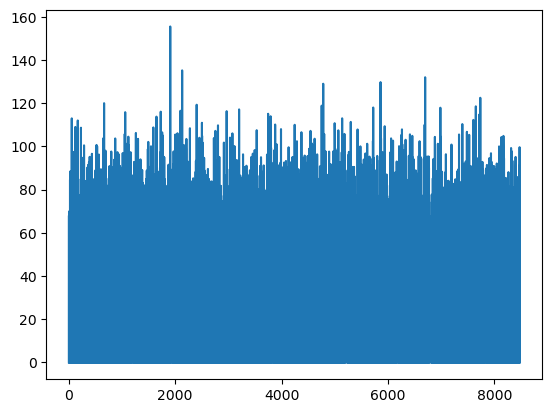

In [10]:
train_data['HeartRateMean'].plot()

Text(0.5, 1.0, 'BP Relation')

<Figure size 500x500 with 0 Axes>

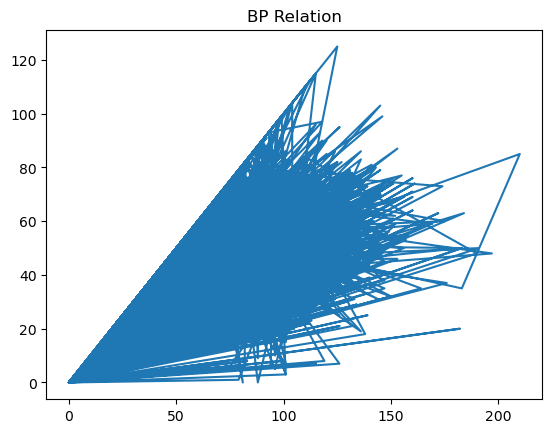

In [11]:
plt.figure(figsize=(5,5))
x = train_data['BPDiastolicMax']
y = train_data['BPDiastolicMin']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('BP Relation')

Text(0.5, 1.0, 'heart Relation with intake of medicines')

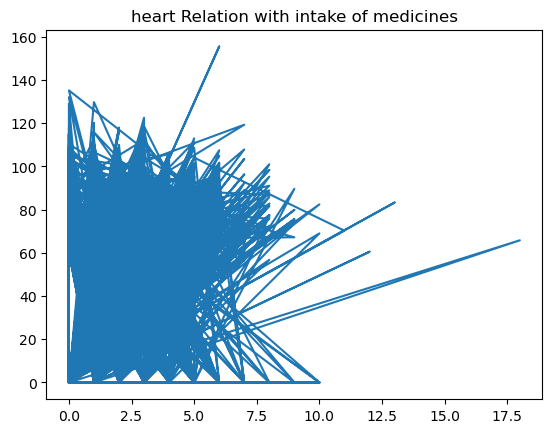

In [12]:
x = train_data['TotalMedicine']
y = train_data['HeartRateMean']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('heart Relation with intake of medicines')

Text(0.5, 1.0, 'Age Relation with changes in Haemoglobin Levels')

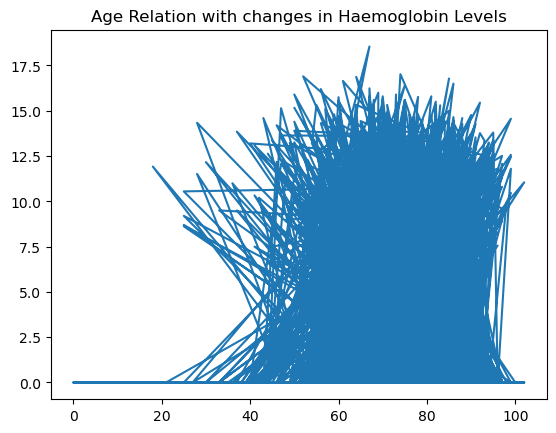

In [13]:
x = train_data['Age']
y = train_data['Hemoglobin']

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Age Relation with changes in Haemoglobin Levels')

## Pre-Processing 

In [14]:
# fill nans
train_data['DiabetesMellitus'].fillna('0',inplace=True)
train_data['ChronicKidneyDisease'].fillna('0',inplace=True)
train_data['Anemia'].fillna('0',inplace=True)
train_data['Depression '].fillna('0',inplace=True)
train_data['ChronicObstructivePulmonaryDisease'].fillna('0',inplace=True)

In [15]:
# drop unecessary columns
train_data.drop('Race',inplace=True,axis=1)
train_data.drop('PatientId',inplace=True,axis=1)
train_data.drop('EncounterId',inplace=True,axis=1)
train_data.drop('ReadmissionDays',inplace=True,axis=1)

In [16]:
# columns with majority data zero
count = 0

for i in train_data.columns:
    count = (train_data[i] == 0).sum()
    
    if count > 7000:
        print(i, count)

ACEInhibitors 7389
ARBs 7657
CardiacTroponin 7574
Hemoglobin 7437
SerumSodium 7179
BNP 8459
NT-proBNP 8466


In [17]:
# Droping columns with major data as zero
train_data.drop('ACEInhibitors', inplace=True,axis=1)
train_data.drop('ARBs', inplace=True,axis=1)
train_data.drop('CardiacTroponin', inplace=True,axis=1)
train_data.drop('Hemoglobin', inplace=True,axis=1)
train_data.drop('SerumSodium', inplace=True,axis=1)
train_data.drop('BNP', inplace=True,axis=1)
train_data.drop('NT-proBNP', inplace=True,axis=1)

In [18]:
train_data

,DischargeDisposision,Gender,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,Age,ChronicDiseaseCount,LengthOfStay,...,PulseRateMean,RespiratoryRateMin,RespiratoryRateMax,RespiratoryRateMedian,RespiratoryRateMean,BetaBlockers,Diuretics,TotalMedicine,SerumCreatinine,ReadmissionWithin_90Days
0,Home,Male,DM,0,Anemia,0,COPD,58,18,3,...,0.000000,0,0,0.0,0.000000,0,0,0,0.000000,Yes
1,Home,Male,DM,CKD,Anemia,Depression,COPD,80,24,6,...,0.000000,14,22,17.5,17.833333,1,5,8,1.540000,No
2,Home,Male,DM,CKD,Anemia,0,COPD,63,11,8,...,0.000000,0,0,0.0,0.000000,1,1,2,0.000000,No
3,Hospice - Home,Female,DM,0,Anemia,0,COPD,73,8,4,...,0.000000,22,22,22.0,22.000000,0,0,0,0.000000,No
4,SNF,Female,0,0,Anemia,0,COPD,85,20,3,...,91.476190,14,20,17.0,17.000000,0,0,0,0.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,Home Health,Female,DM,CKD,Anemia,0,COPD,59,14,21,...,0.000000,9,107,26.0,32.885714,2,3,6,1.076667,Yes
8477,SNF,Male,DM,CKD,0,Depression,COPD,86,13,19,...,0.000000,0,0,0.0,0.000000,0,0,0,0.000000,Yes
8478,Hospice,Female,0,0,0,0,0,94,2,12,...,111.863636,1,22,16.0,14.904762,1,0,1,0.000000,No
8479,Home,Female,DM,CKD,0,Depression,0,77,19,3,...,79.666667,16,18,17.0,16.875000,1,1,5,1.690000,Yes


													Testing Data

In [19]:
# Droping Least Significant Cells
test_data.drop('ACEInhibitors', inplace=True,axis=1)
test_data.drop('ARBs', inplace=True,axis=1)
test_data.drop('CardiacTroponin', inplace=True,axis=1)
test_data.drop('Hemoglobin', inplace=True,axis=1)
test_data.drop('SerumSodium', inplace=True,axis=1)
test_data.drop('BNP', inplace=True,axis=1)
test_data.drop('NT-proBNP', inplace=True,axis=1)
test_data.drop('Race',inplace=True,axis=1)
test_data.drop('PatientId',inplace=True,axis=1)
test_data.drop('EncounterId',inplace=True,axis=1)

In [20]:
# filling nans
test_data['DiabetesMellitus'].fillna('0',inplace=True)
test_data['ChronicKidneyDisease'].fillna('0',inplace=True)
test_data['Anemia'].fillna('0',inplace=True)
test_data['Depression '].fillna('0',inplace=True)
test_data['ChronicObstructivePulmonaryDisease'].fillna('0',inplace=True)

In [21]:
test_data

,DischargeDisposision,Gender,DiabetesMellitus,ChronicKidneyDisease,Anemia,Depression,ChronicObstructivePulmonaryDisease,Age,ChronicDiseaseCount,LengthOfStay,...,PulseRateMean,RespiratoryRateMin,RespiratoryRateMax,RespiratoryRateMedian,RespiratoryRateMean,BetaBlockers,Diuretics,TotalMedicine,SerumCreatinine,PredictedReadmissionWithin_90Days
0,Home,Female,0,0,0,0,COPD,66.0,6.0,3.0,...,65.833333,12.0,20.0,17.0,16.421053,0.0,0.0,1.0,0.00,0.0
1,Home,Female,DM,CKD,Anemia,Depression,0,86.0,21.0,1.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,1.0
2,Home,Male,DM,0,Anemia,0,0,84.0,11.0,1.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0
3,IRF,Male,DM,CKD,Anemia,Depression,COPD,77.0,21.0,12.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,1.0
4,Home Health,Female,DM,0,0,0,COPD,74.0,11.0,8.0,...,73.000000,10.0,40.0,18.0,20.720000,1.0,3.0,4.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,Expired,Male,DM,0,0,0,COPD,77.0,17.0,25.0,...,0.000000,8.0,162.0,41.5,49.045455,1.0,2.0,4.0,1.38,0.0
2117,Home Health,Male,0,CKD,0,Depression,0,82.0,14.0,9.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,1.0
2118,ACH,Female,DM,0,0,0,COPD,67.0,17.0,6.0,...,0.000000,16.0,20.0,17.5,17.750000,1.0,2.0,3.0,1.04,1.0
2119,Home Health,Male,DM,CKD,Anemia,0,COPD,71.0,16.0,3.0,...,0.000000,16.0,20.0,18.0,18.000000,1.0,2.0,4.0,0.00,0.0


														Modeling

## Encoding

In [22]:
le = LabelEncoder()

# Training Data
categ = ['DischargeDisposision','Gender','DiabetesMellitus','ChronicKidneyDisease','Anemia','Depression ','ChronicObstructivePulmonaryDisease','ReadmissionWithin_90Days']
train_data[categ] = train_data[categ].apply(le.fit_transform)

# Test Data
category=  ['DischargeDisposision','Gender','DiabetesMellitus','ChronicKidneyDisease','Anemia','Depression ','ChronicObstructivePulmonaryDisease']
test_data[category] = test_data[category].apply(le.fit_transform)

## Train-Test Split

In [23]:
# Training Data
X_train = train_data.drop('ReadmissionWithin_90Days',axis=1)
y_train = train_data['ReadmissionWithin_90Days']

In [24]:
# Testing Data
X_test = test_data.drop('PredictedReadmissionWithin_90Days',axis=1)
y_test = test_data['PredictedReadmissionWithin_90Days']

## Scale & Balance

In [25]:
# Data Balancing
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [26]:
# Scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

														Modeling

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#### DecisionTreeClassifier

In [29]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train_sc, y_train)
pred = dtree.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)  

Accuracy :  63.17774634606318


In [30]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      1497
         1.0       0.39      0.47      0.43       624

    accuracy                           0.63      2121
   macro avg       0.58      0.59      0.58      2121
weighted avg       0.65      0.63      0.64      2121

F1 Score :  57.91560820610846
Confusion Matrix :
 [[1045  452]
 [ 329  295]]


In [31]:
#decisiontree hyperparameter tuning
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(dtree, param_grid={'criterion': ['gini', 'entropy']},cv=10,scoring='accuracy')
# grid.fit(X_train_sc,y_train)
# pred = grid.predict(X_test_sc)

In [32]:
# Displaying
# print ("Accuracy : " , accuracy_score(y_test,pred)*100)  
# print("Report : \n", classification_report(y_test, pred))
# print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
# print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

#### Random Forest Classifier

In [33]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini")
rm.fit(X_train_sc, y_train)
pred = rm.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)  

Accuracy :  66.57237152286658


In [34]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

         0.0       0.76      0.76      0.76      1497
         1.0       0.43      0.44      0.43       624

    accuracy                           0.67      2121
   macro avg       0.60      0.60      0.60      2121
weighted avg       0.67      0.67      0.67      2121

F1 Score :  59.84774713988536
Confusion Matrix :
 [[1140  357]
 [ 352  272]]


#### Logistic Regression

In [35]:
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train_sc, y_train)
pred = logit.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100) 

Accuracy :  69.35407826496936


In [36]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      1497
         1.0       0.48      0.46      0.47       624

    accuracy                           0.69      2121
   macro avg       0.63      0.62      0.63      2121
weighted avg       0.69      0.69      0.69      2121

F1 Score :  62.60618849746666
Confusion Matrix :
 [[1186  311]
 [ 339  285]]


#### XG Boost

In [37]:
clf4 = xgb.XGBClassifier()
clf4.fit(X_train_sc, y_train)
pred = clf4.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)  

Accuracy :  65.44082979726544


In [38]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.71      0.74      1497
         1.0       0.43      0.52      0.47       624

    accuracy                           0.65      2121
   macro avg       0.60      0.61      0.61      2121
weighted avg       0.68      0.65      0.66      2121

F1 Score :  60.62151270099342
Confusion Matrix :
 [[1065  432]
 [ 301  323]]


#### Gradient Boosting

In [39]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
pred = clf.predict(X_test)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)  

Accuracy :  65.72371522866572


In [40]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

         0.0       0.81      0.68      0.74      1497
         1.0       0.44      0.61      0.51       624

    accuracy                           0.66      2121
   macro avg       0.62      0.64      0.62      2121
weighted avg       0.70      0.66      0.67      2121

F1 Score :  62.43005737701124
Confusion Matrix :
 [[1011  486]
 [ 241  383]]


#### MLP Classifier

In [41]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train_sc, y_train)
pred = mlp.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)  

Accuracy :  64.87505893446487


In [42]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      1497
         1.0       0.42      0.53      0.47       624

    accuracy                           0.65      2121
   macro avg       0.60      0.61      0.60      2121
weighted avg       0.68      0.65      0.66      2121

F1 Score :  60.385901181921085
Confusion Matrix :
 [[1045  452]
 [ 293  331]]


#### SVC Model

In [43]:
svc = SVC(kernel='linear')
svc.fit(X_train_sc,y_train)
pred = svc.predict(X_test_sc)

print ("Accuracy : " , accuracy_score(y_test,pred)*100)  

Accuracy :  70.72135785007072


In [44]:
# Results
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)
print("Confusion Matrix :\n" , confusion_matrix(y_test,pred))

Report : 
               precision    recall  f1-score   support

         0.0       0.77      0.84      0.80      1497
         1.0       0.50      0.38      0.44       624

    accuracy                           0.71      2121
   macro avg       0.63      0.61      0.62      2121
weighted avg       0.69      0.71      0.69      2121

F1 Score :  61.91297830313156
Confusion Matrix :
 [[1260  237]
 [ 384  240]]


## Hard Voting

In [47]:
def hardVoting():
    
    counter = 0
    highest_accuracy = 0
    
    while(True): 
        
        hv = VotingClassifier(estimators=[('rf',rm), ('xgb',clf4), ('lr',logit)], voting='hard', weights=(2,0,2))
        hv.fit(X_train_sc, y_train)
        pred = hv.predict(X_test_sc)
        
        accuracy = accuracy_score(y_test, pred) * 100
        print (str(counter) + " Accuracy : " , accuracy)
        
        if accuracy > highest_accuracy:
            
            highest_accuracy = accuracy
            predictions = pd.DataFrame(pred)
            
        if (accuracy > 75) or (counter > 50):
            
            print("\n\n\t\t\tLimit Reached")
            predictions.to_csv("Predictions.csv", index=False)
            
            print("Highest Accuracy : ", highest_accuracy)
            break

        counter += 1

In [48]:
hardVoting()

0 Accuracy :  72.46581801037246
1 Accuracy :  71.52286657237153
2 Accuracy :  72.41867043847242
3 Accuracy :  72.32437529467232
4 Accuracy :  72.04148986327205
5 Accuracy :  71.66430928807166
6 Accuracy :  72.27722772277228
7 Accuracy :  72.7015558698727
8 Accuracy :  72.46581801037246
9 Accuracy :  72.93729372937293
10 Accuracy :  71.94719471947195
11 Accuracy :  72.32437529467232
12 Accuracy :  72.60726072607261
13 Accuracy :  72.37152286657236
14 Accuracy :  71.33427628477133
15 Accuracy :  72.46581801037246
16 Accuracy :  72.04148986327205
17 Accuracy :  71.9000471475719
18 Accuracy :  72.23008015087224
19 Accuracy :  72.04148986327205
20 Accuracy :  72.46581801037246
21 Accuracy :  71.8057520037718
22 Accuracy :  72.37152286657236
23 Accuracy :  72.32437529467232
24 Accuracy :  72.13578500707214
25 Accuracy :  71.9000471475719
26 Accuracy :  72.93729372937293
27 Accuracy :  72.65440829797265
28 Accuracy :  72.04148986327205
29 Accuracy :  72.04148986327205
30 Accuracy :  72.324375